<a href="https://colab.research.google.com/github/gabrielhozana/Animals-of-3-types-Model/blob/main/Animals_of_3_types_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
!pip install kaggle

from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 69 bytes


In [ ]:
# https://www.kaggle.com/viratkothari/animal10
!kaggle datasets download -d viratkothari/animal10

 99% 580M/585M [00:05<00:00, 126MB/s]
100% 585M/585M [00:05<00:00, 119MB/s]


In [ ]:
!unzip animal10

Streaming output truncated to the last 5000 lines.
  inflating: Animals-10/spider/spider (2373).jpeg  
  inflating: Animals-10/spider/spider (2374).jpeg  
  inflating: Animals-10/spider/spider (2375).jpeg  
  inflating: Animals-10/spider/spider (2376).jpeg  
  inflating: Animals-10/spider/spider (2377).jpeg  
  inflating: Animals-10/spider/spider (2378).jpeg  
  inflating: Animals-10/spider/spider (2379).jpeg  
  inflating: Animals-10/spider/spider (238).jpeg  
  inflating: Animals-10/spider/spider (238).jpg  
  inflating: Animals-10/spider/spider (2380).jpeg  
  inflating: Animals-10/spider/spider (2381).jpeg  
  inflating: Animals-10/spider/spider (2382).jpeg  
  inflating: Animals-10/spider/spider (2383).jpeg  
  inflating: Animals-10/spider/spider (2384).jpeg  
  inflating: Animals-10/spider/spider (2385).jpeg  
  inflating: Animals-10/spider/spider (2386).jpeg  
  inflating: Animals-10/spider/spider (2387).jpeg  
  inflating: Animals-10/spider/spider (2388).jpeg  
  inflating: Ani

In [ ]:
import os
dir_butterfly = os.listdir('/content/Animals-10/butterfly')
dir_cat = os.listdir('/content/Animals-10/cat')
dir_chicken = os.listdir('/content/Animals-10/chicken')
dir_cow = os.listdir('/content/Animals-10/cow')
dir_dog = os.listdir('/content/Animals-10/dog')
dir_elephant = os.listdir('/content/Animals-10/elephant')
dir_horse = os.listdir('/content/Animals-10/horse')
dir_sheep = os.listdir('/content/Animals-10/sheep')
dir_spider = os.listdir('/content/Animals-10/spider')
dir_squirrel = os.listdir('/content/Animals-10/squirrel')
dir = [dir_butterfly, dir_cat, dir_chicken, dir_cow, dir_dog, dir_elephant, dir_horse, dir_sheep, dir_spider, dir_squirrel]

for i in dir:
  print(len(i))

2112
1668
3098
1866
4863
1446
2623
1820
4821
1862


In [ ]:
!mkdir data

In [ ]:
!mv /content/Animals-10/chicken /content/data/chicken/
!mv /content/Animals-10/dog /content/data/dog/
!mv /content/Animals-10/spider /content/data/spider/

In [ ]:
from PIL import Image
image = Image.open('/content/data/chicken/chicken (1).jpeg')
print(image.size)

(182, 300)


In [ ]:
image2 = Image.open('/content/data/chicken/chicken (10).jpeg')
print(image2.size)

(300, 225)


In [ ]:
image3 = Image.open('/content/data/dog/dog (10).jpeg')
print(image3.size)

(225, 300)


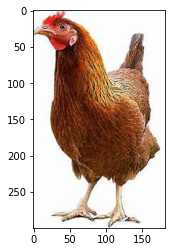

In [ ]:
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
img = image.load_img('/content/data/chicken/chicken (1).jpeg')
imgplot = plt.imshow(img)

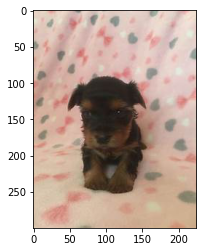

In [ ]:
img = image.load_img('/content/data/dog/dog (10).jpeg')
imgplot = plt.imshow(img)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator     
     
train_dir = os.path.join('/content/data')
train_datagen = ImageDataGenerator(rescale=1./255,
                                   zoom_range=0.2,
                                   shear_range=0.2,
                                   rotation_range=40,
                                  #  width_shift_range=0.2,
                                  #  height_shift_range=0.2,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   fill_mode = 'nearest',
                                   validation_split=0.2) # set validation split

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    # batch_size=8,
    class_mode='categorical',
    subset='training') # set as training data
validation_generator = train_datagen.flow_from_directory(
    train_dir, # same directory as training data
    target_size=(150, 150),
    # batch_size=16,
    class_mode='categorical',
    subset='validation')

Found 10227 images belonging to 3 classes.
Found 2555 images belonging to 3 classes.


In [ ]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),  
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),    
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
model.compile(optimizer=tf.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics = ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 17, 17, 128)      

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.92 and logs.get('val_accuracy')>0.92):
      print("\nAkurasi telah mencapai >92%!")
      self.model.stop_training = True
callbacks = myCallback()

In [ ]:
history = model.fit(train_generator,
                    validation_data=validation_generator,
                    epochs=150,
                    verbose=2, 
                    callbacks=[callbacks])

Epoch 1/150
320/320 - 76s - loss: 0.9907 - accuracy: 0.4998 - val_loss: 0.8673 - val_accuracy: 0.6266
Epoch 2/150
320/320 - 75s - loss: 0.7822 - accuracy: 0.6560 - val_loss: 0.7209 - val_accuracy: 0.6877
Epoch 3/150
320/320 - 75s - loss: 0.6779 - accuracy: 0.7053 - val_loss: 0.5661 - val_accuracy: 0.7581
Epoch 4/150
320/320 - 75s - loss: 0.5605 - accuracy: 0.7675 - val_loss: 0.5209 - val_accuracy: 0.7773
Epoch 5/150
320/320 - 75s - loss: 0.4937 - accuracy: 0.8010 - val_loss: 0.4417 - val_accuracy: 0.8395
Epoch 6/150
320/320 - 75s - loss: 0.4436 - accuracy: 0.8274 - val_loss: 0.4178 - val_accuracy: 0.8341
Epoch 7/150
320/320 - 75s - loss: 0.4100 - accuracy: 0.8463 - val_loss: 0.4410 - val_accuracy: 0.8321
Epoch 8/150
320/320 - 75s - loss: 0.3846 - accuracy: 0.8541 - val_loss: 0.4914 - val_accuracy: 0.8149
Epoch 9/150
320/320 - 75s - loss: 0.3723 - accuracy: 0.8612 - val_loss: 0.3660 - val_accuracy: 0.8669
Epoch 10/150
320/320 - 75s - loss: 0.3527 - accuracy: 0.8675 - val_loss: 0.3500 - 

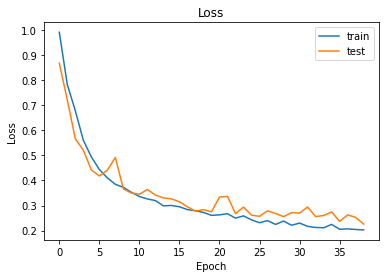

In [ ]:
import matplotlib.pyplot as plt
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show();

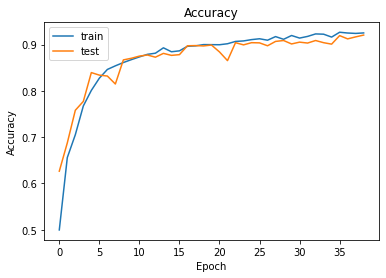

In [ ]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show();

In [ ]:
# Konversi model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

INFO:tensorflow:Assets written to: /tmp/tmp4gxszz9d/assets


In [ ]:
with tf.io.gfile.GFile('model.tflite', 'wb') as f:
  f.write(tflite_model)